# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [27]:
%matplotlib inline

In [28]:
plt.rcParams['figure.figsize'] = (10, 5)

In [29]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [30]:
if os.path.isfile("statement.csv"):
    filepath = "statement.csv"
    print("loading from file")

where_money = pd.read_csv(filepath,parse_dates=[0], dayfirst=True)
print("done")

loading from file
done


In [31]:
where_money.head(30)

Date  Credit   Debit  \
0  2021-07-01     NaN  -13.99   
1  2021-07-01     NaN  -10.13   
2  2021-07-01     NaN   -8.80   
3  2021-06-30     NaN   -8.86   
4  2021-06-24     NaN  -24.00   
5  2021-06-24     NaN  -22.35   
6  2021-06-24     NaN  -20.07   
7  2021-06-23     NaN   -9.90   
8  2021-06-23     NaN -202.30   
9  2021-06-22     NaN  -31.86   
10 2021-06-22     NaN  -16.70   
11 2021-06-22     NaN  -19.70   
12 2021-06-22     NaN  -37.00   
13 2021-06-21     NaN -322.75   
14 2021-06-20     NaN  -13.00   
15 2021-06-19     NaN -300.00   
16 2021-06-19   500.0     NaN   
17 2021-06-19     NaN  -31.98   
18 2021-06-19     NaN  -49.96   
19 2021-06-17    16.7     NaN   
20 2021-06-16   310.0     NaN   
21 2021-06-15     NaN  -16.00   
22 2021-06-15     NaN  -11.90   
23 2021-06-15     NaN  -15.80   
24 2021-06-15     NaN   -7.00   
25 2021-06-15     NaN  -24.71   
26 2021-06-15     NaN   -5.50   
27 2021-06-15     NaN  -83.00   
28 2021-06-12    45.0     NaN   
29 2021-06-12     NaN   -7.25   

                                          Transaction  Balance  
0   AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...    98.98  
1   AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...   112.97  
2   AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...   123.10  
3   AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...   131.90  
4    Transfer To Cheuk Chi Ho CommBank App jess lunch   140.76  
5   HUNGRY JACKS BASS HILL BASS HILL AU AUS Card x...   164.76  
6   7-ELEVEN 2272 RYDE NS AUS Card xx9617 Value Da...   187.11  
7                         MCDONALDS DURAL DURAL NSWAU   207.18  
8   CANDLE SUPPLY PTY WETHERILL PAR NS AUS Card xx...   217.08  
9   PAYPAL *ENEBA 4029357733 AU AUS Card xx9617 Va...   419.38  
10  ITS TIME FOR THAI PL KINGSFORD NS AUS Card xx9...   451.24  
11  ITS TIME FOR THAI PL KINGSFORD NS AUS Card xx9...   467.94  
12  PAYPAL *EBAY AU 4029357733 AU AUS Tap and Pay ...   487.64  
13                EROMA STORE MORTDALE AU Card xx9617   524.64  
14                     Lab Strathfield Strathfield AU   847.39  
15          Transfer To Bask CommBank App tim payment   860.39  
16                  Transfer from xx9392 CommBank app  1160.39  
17  AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...   660.39  
18  AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...   692.37  
19                            Refund Purchase Beem It   742.33  
20     CASH DEPOSIT CBA ATM EASTWOOD A NSW 216101 AUS   725.63  
21  UNSW LIBRARY UNSW SYDNEY NS AUS Card xx9617 Va...   415.63  
22  Guzman y Gomez UNSW Kensington NS AUS Card xx9...   431.63  
23  The Smelly Cheesecak Strathfield NS AUS Card x...   443.53  
24  7-ELEVEN 2086 GLEBE NS AUS Card xx9617 Value D...   459.33  
25  7-ELEVEN 2273 WEST RYDE NS AUS Card xx9617 Val...   466.33  
26  SAPPHO BOOKS N CAFE GLEBE NS AUS Card xx9617 V...   491.04  
27  Stra Hansang STRATHFIELD NS AUS Card xx9617 Va...   496.54  
28                            Refund Purchase Beem It   579.54  
29  7-ELEVEN 2256 PADDINGTON NS AUS Card xx9617 Va...   534.54

In [32]:
where_money.columns

Index(['Date', 'Credit', 'Debit', 'Transaction', 'Balance'], dtype='object')

In [33]:
where_money.index

RangeIndex(start=0, stop=1068, step=1)

In [34]:
row = where_money.iloc[5]
print(row)

Date                                         2021-06-24 00:00:00
Credit                                                       NaN
Debit                                                     -22.35
Transaction    HUNGRY JACKS BASS HILL BASS HILL AU AUS Card x...
Balance                                                   164.76
Name: 5, dtype: object


In [35]:
row["Debit"]
row.Debit

-22.35

In [36]:
where_money["Credit"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1063   NaN
1064   NaN
1065   NaN
1066   NaN
1067   NaN
Name: Credit, Length: 1068, dtype: float64

In [37]:
where_money.Debit.sum()

-98914.27

In [38]:
where_money.set_index("Date").groupby(pd.Grouper(freq="1M")).sum().Debit

Date
2019-07-31    -7349.36
2019-08-31    -5131.30
2019-09-30     -409.67
2019-10-31   -12255.96
2019-11-30    -6351.68
2019-12-31    -1510.25
2020-01-31    -2205.48
2020-02-29   -16686.38
2020-03-31    -5375.89
2020-04-30     -616.68
2020-05-31      -98.33
2020-06-30    -5374.06
2020-07-31    -2108.89
2020-08-31    -1841.35
2020-09-30    -3550.25
2020-10-31    -2193.98
2020-11-30    -1696.18
2020-12-31    -7392.25
2021-01-31    -1474.79
2021-02-28    -5876.65
2021-03-31     -910.22
2021-04-30     -669.57
2021-05-31     -993.10
2021-06-30    -6809.08
2021-07-31      -32.92
Freq: M, Name: Debit, dtype: float64

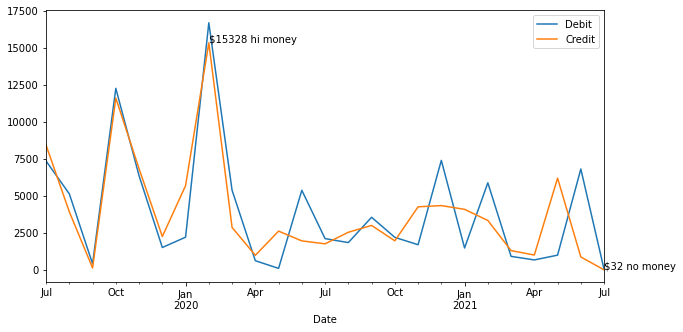

In [47]:
debit_by_m = where_money.set_index("Date").groupby(pd.Grouper(freq="1M")).sum().Debit.abs()
debit_by_m.plot()
credit_by_m = where_money.set_index("Date").groupby(pd.Grouper(freq="1M")).sum().Credit
credit_by_m.plot()

date_bye = debit_by_m.idxmin() #.idxmax
bye = int(debit_by_m.loc[date_bye])
plt.annotate(f"${bye} no money", (date_bye, bye))
date_hi = credit_by_m.idxmax() #.idxmax
hi = int(credit_by_m.loc[date_hi])
plt.annotate(f"${hi} hi money", (date_hi, hi))
plt.legend()

<AxesSubplot:xlabel='Date'>

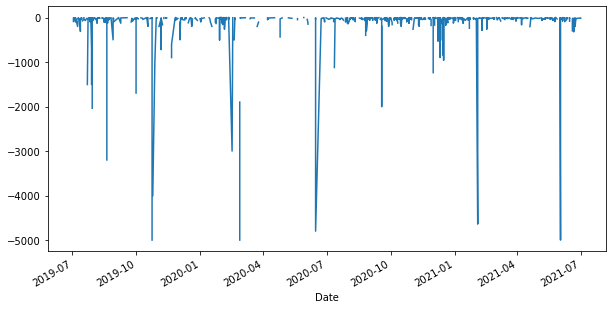

In [48]:
where_money.set_index("Date")["Debit"].plot()


<AxesSubplot:xlabel='Date'>

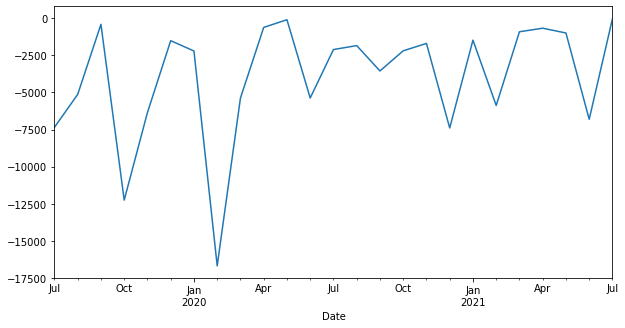

In [225]:
where_money.set_index("Date").groupby(pd.Grouper(freq="1M")).sum().Debit.plot()

<AxesSubplot:xlabel='Date'>

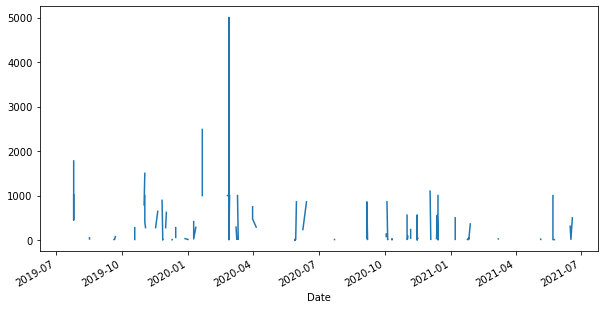

In [226]:
where_money.set_index("Date")["Credit"].plot()

<AxesSubplot:xlabel='Date'>

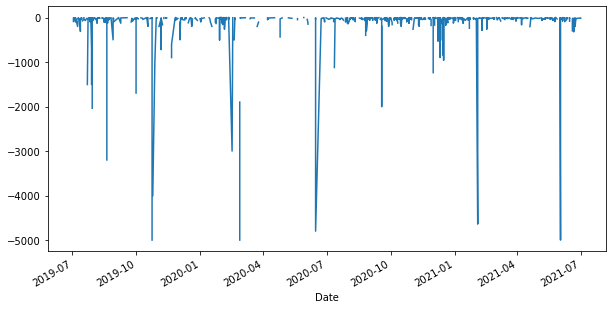

In [227]:
where_money.set_index("Date")["Debit"].plot()

<AxesSubplot:xlabel='Date'>

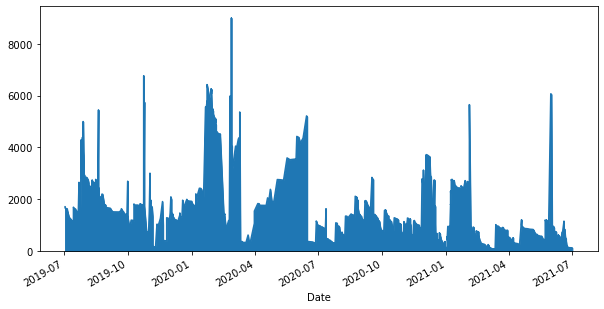

In [228]:
where_money.set_index("Date").Balance.plot.area()

<AxesSubplot:>

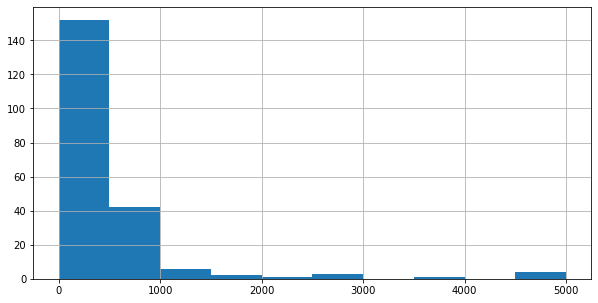

In [229]:
where_money["Credit"].hist()

Text(0, 0.5, 'Frequency')

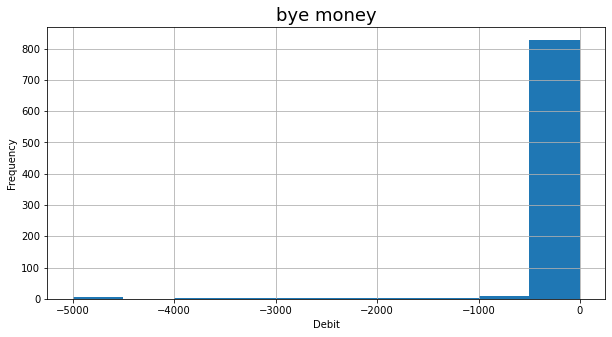

In [230]:
where_money["Debit"].hist()
plt.title("bye money", fontsize=18)
plt.xlabel("Debit")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

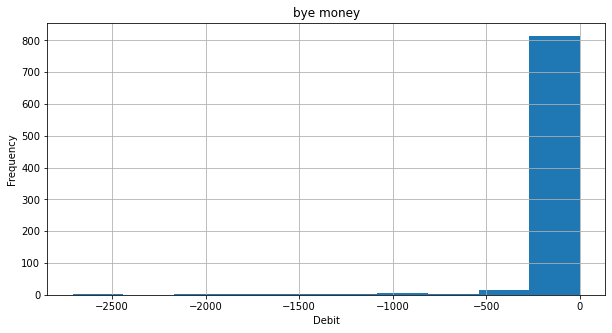

In [231]:
where_money["Debit"][where_money["Debit"] > -3000].hist()
plt.title("bye money")
plt.xlabel("Debit")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

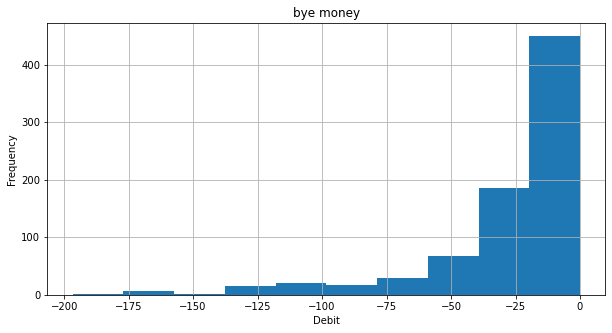

In [232]:
where_money["Debit"][where_money["Debit"] > -200].hist()
plt.title("bye money")
plt.xlabel("Debit")
plt.ylabel("Frequency")

Sum of saving = $35365.38
Sum taken from saving = $34078.34
Actual saving = $1287


C:\Users\Tim\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


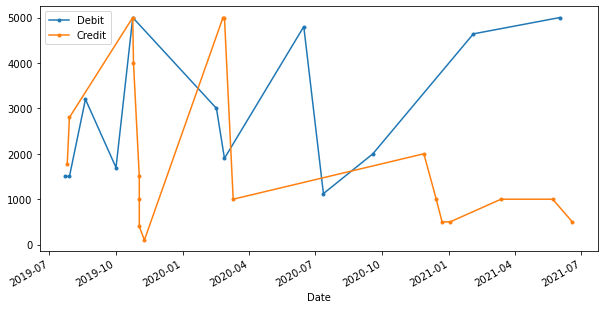

In [233]:
Trandf = where_money[["TO XX9392" in x.upper() for x in where_money.Transaction]]
Trandf.Debit = Trandf.Debit.abs()
Trandf.set_index("Date").Debit.plot(style='.-')
print(f"Sum of saving = ${Trandf.Debit.sum()}")
takedf = where_money[["FROM XX9392" in x.upper() for x in where_money.Transaction]]
takedf.set_index("Date").Credit.plot(style='.-')
print(f"Sum taken from saving = ${takedf.Credit.sum()}")
actual_sum = Trandf.Debit.sum() - takedf.Credit.sum() 
print(f"Actual saving = ${int(actual_sum)}")
plt.legend()

In [248]:
trans5000 = where_money[(where_money.Date > '2019-10') & (where_money.Date < '2019-11') & ["TO XX9392" in x.upper() for x in where_money.Transaction]]
take5000 = where_money[(where_money.Date > '2019-10') & (where_money.Date < '2019-11') & ["FROM XX9392" in x.upper() for x in where_money.Transaction]]
print(trans5000)
print(take5000)


          Date  Credit   Debit                      Transaction  Balance
923 2019-10-24     NaN -5000.0  Transfer to xx9392 CommBank app  1750.44
          Date  Credit  Debit                        Transaction  Balance
922 2019-10-25  4000.0    NaN  Transfer from xx9392 CommBank app  5750.44
925 2019-10-24  5000.0    NaN  Transfer from xx9392 CommBank app  6760.44


In [160]:
where_money.iloc[920:930]

Date  Credit    Debit  \
920 2019-10-28     NaN -1000.00   
921 2019-10-25     NaN -4000.00   
922 2019-10-25  4000.0      NaN   
923 2019-10-24     NaN -5000.00   
924 2019-10-24     NaN   -10.00   
925 2019-10-24  5000.0      NaN   
926 2019-10-24     NaN   -17.00   
927 2019-10-24     NaN    -6.50   
928 2019-10-23     NaN    -4.00   
929 2019-10-23     NaN   -11.08   

                                           Transaction  Balance  
920          Transfer to other Bank CommBank app stonk   750.44  
921          Transfer to other Bank CommBank app stonk  1750.44  
922                  Transfer from xx9392 CommBank app  5750.44  
923                    Transfer to xx9392 CommBank app  1750.44  
924           Transfer to other Bank CommBank app test  6750.44  
925                  Transfer from xx9392 CommBank app  6760.44  
926  PAYPAL *STAN 4029357733 AU AUS Card xx3506 Val...  1760.44  
927  HJ CHATSWOOD PTY LTD CHATSWOOD NS AUS Card xx3...  1777.44  
928                       Hungry Jacks WoolloomoolooAU  1783.94  
929  SMP*Makanai Chatwsood Chatswood AU AUS Card xx...  1787.94

Sum of saving = $35365.38


Date  Credit    Debit                      Transaction  Balance
49   2021-06-02     NaN  5000.00  Transfer to xx9392 CommBank app  1007.02
226  2021-02-03     NaN  4640.49  Transfer to xx9392 CommBank app  1010.99
539  2020-09-18     NaN  2000.26  Transfer to xx9392 CommBank app   764.00
653  2020-07-12     NaN  1123.34  Transfer to xx9392 CommBank app   514.99
671  2020-06-15     NaN  4800.00  Transfer to xx9392 CommBank app   378.08
729  2020-02-27     NaN  1900.00  Transfer to xx9392 CommBank app  2089.56
746  2020-02-16     NaN  3000.00  Transfer to xx9392 CommBank app  1445.15
923  2019-10-24     NaN  5000.00  Transfer to xx9392 CommBank app  1750.44
948  2019-10-01     NaN  1696.76  Transfer to xx9392 CommBank app  1003.30
980  2019-08-20     NaN  3200.00  Transfer to xx9392 CommBank app  2248.91
1023 2019-07-29     NaN  1500.00  Transfer to xx9392 CommBank app  2200.64
1039 2019-07-23     NaN  1504.53  Transfer to xx9392 CommBank app  1152.00

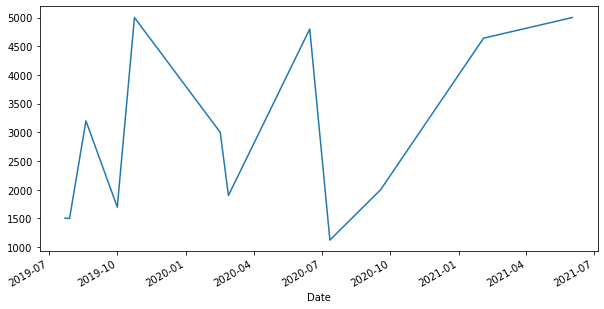

In [65]:
Trandf = where_money[["TO XX9392" in x.upper() for x in where_money.Transaction]]
Trandf.Debit = Trandf.Debit* -1
Trandf.set_index("Date").Debit.plot()
print(f"Sum of saving = ${Trandf.Debit.sum()}")
Trandf


In [26]:
count = 0
for x in where_money["Transaction"]:
    if "Beem" in x:
        print(x)
        count = count + 1
print(f"COUNT: {count}")

Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It Value Date: 26/05/2021
Refund Purchase Beem It Value Date: 26/05/2021
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Beem It
Beem It
Beem It
Refund Purchase Beem It
Refund Purchase Beem It
Beem It
Refund Purchase Beem It
COUNT: 23


In [ ]:
location = [T.upper() for T in where_money["Transaction"]]
eastwood_count = 0
for x in location:
    if "GENEVIEVE" in x:
        print(x)
        eastwood_count = eastwood_count + 1
print(eastwood_count)


TRANSFER FROM GENEVIEVE LAM FOOD
TRANSFER FROM GENEVIEVE LAM WINEE
TRANSFER FROM GENEVIEVE LAM EARRING
TRANSFER FROM GENEVIEVE LAM COMMBANK APP ESTHER GEN
TRANSFER FROM GENEVIEVE LAM COMMBANK APP PIZZA
TRANSFER FROM GENEVIEVE LAM COMMBANK APP FOODZ
TRANSFER FROM GENEVIEVE LAM COMMBANK APP FOODZ
TRANSFER FROM GENEVIEVE LAM COMMBANK APP FOODZ
TRANSFER FROM GENEVIEVE LAM COMMBANK APP YOO
TRANSFER FROM GENEVIEVE LAM COMMBANK APP BEEM SUCKS
TRANSFER FROM GENEVIEVE LAM COMMBANK APP DUMB BISH
11


In [ ]:
where_money["Transaction"].value_counts()

Refund Purchase BEEM IT BEEM.COM.AU AU                                         45
BEEM IT BEEM.COM.AU AU Card xx9617                                             25
Transfer from xx9392 CommBank app                                              18
Refund Purchase Beem It                                                        17
Transfer to xx9392 CommBank app                                                12
                                                                               ..
PAYPAL *STOCKX 1352618 4029357733 AU AUS Card xx9617 Value Date: 04/02/2021     1
Transfer To Cheuk Chi Ho CommBank App pizza?                                    1
AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx9617 Value Date: 10/03/2021         1
TAN VIET EASTWOOD PT EASTWOOD NSWAU                                             1
Transfer to other Bank CommBank app feb2020                                     1
Name: Transaction, Length: 753, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<AxesSubplot:>

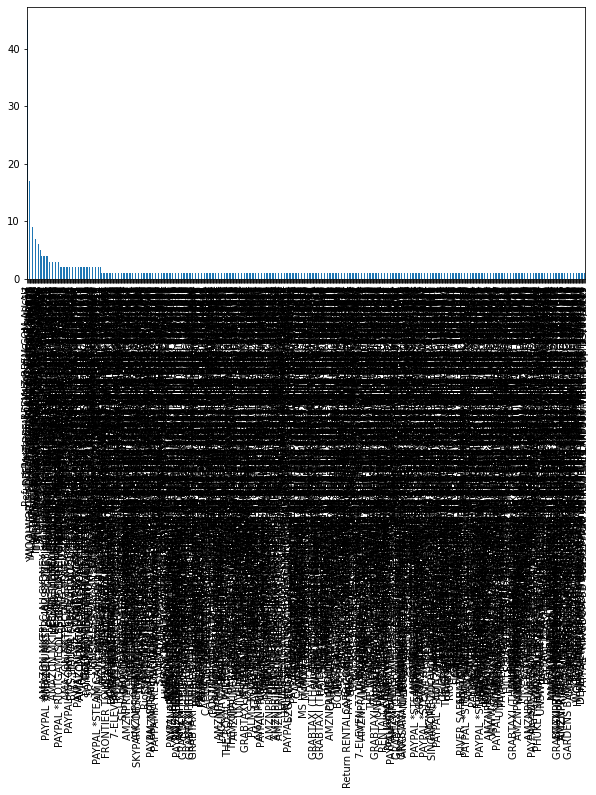

In [ ]:
where_money["Transaction"].value_counts().plot(kind="bar")

<AxesSubplot:>

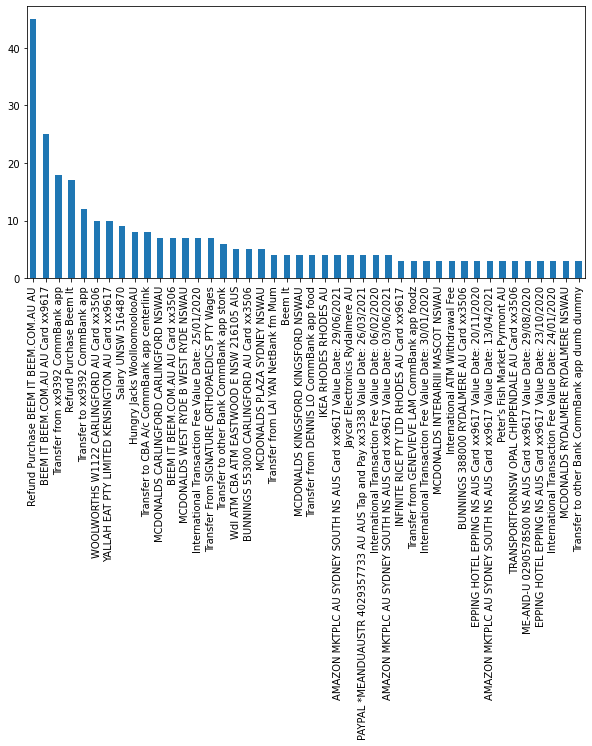

In [ ]:
pdvc = where_money["Transaction"].value_counts()
pdvc[pdvc > 2].plot(kind="bar")

This pattern keeps repeating itself:

<AxesSubplot:>

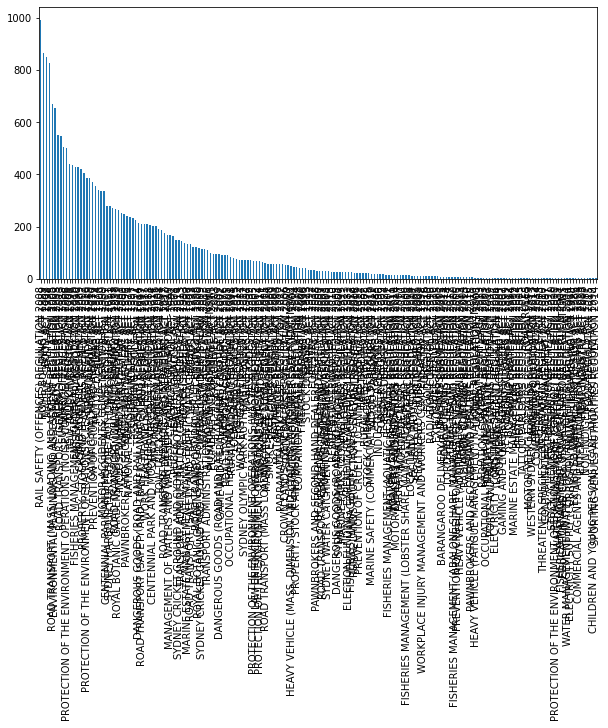

In [ ]:
pdvc[pdvc < 1000].plot(kind="bar")

<AxesSubplot:>

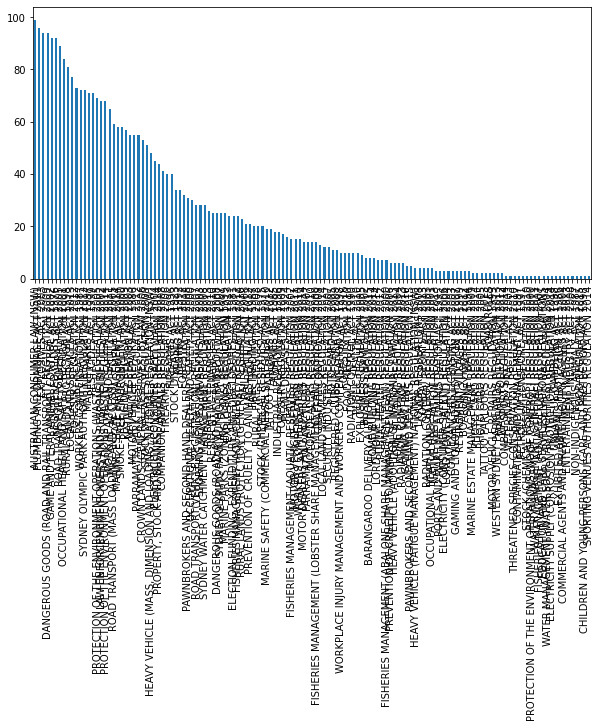

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

<AxesSubplot:>

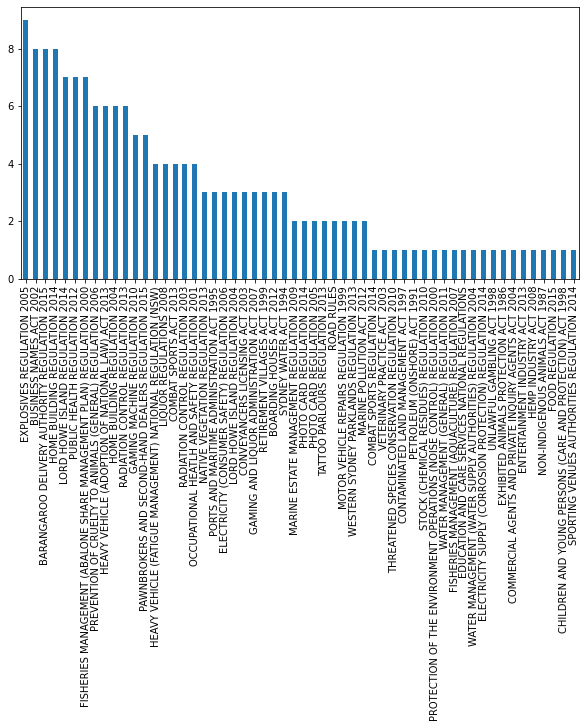

In [ ]:
pdvc[pdvc < 10].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(10000)

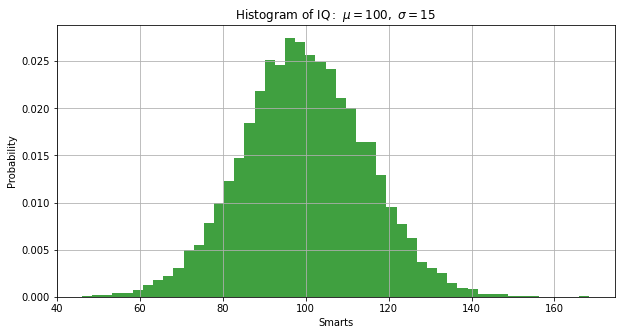

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
plt.grid(True)
# plt.show()

Here's how we made our histogram before:

<AxesSubplot:>

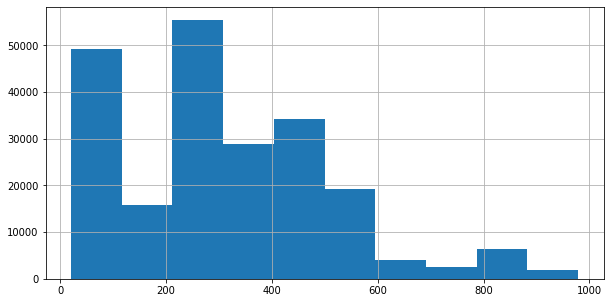

In [ ]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using matpolotlib directly:

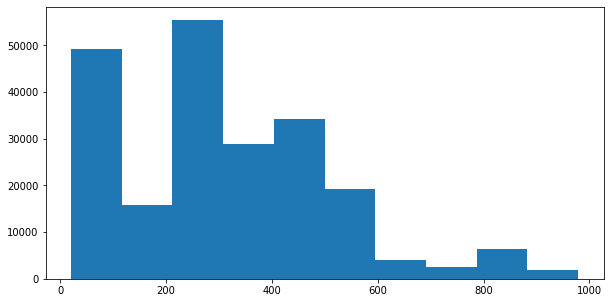

In [ ]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

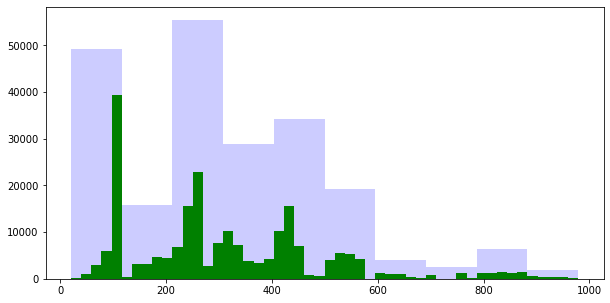

In [ ]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

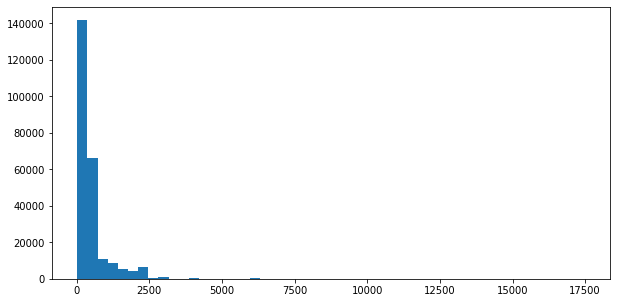

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

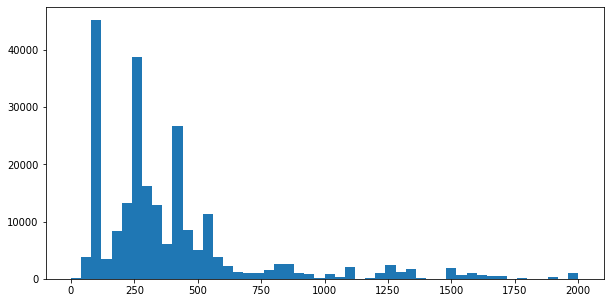

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

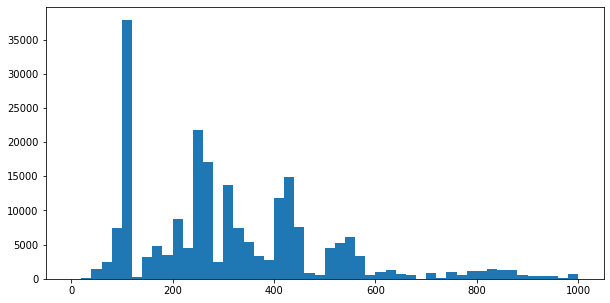

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

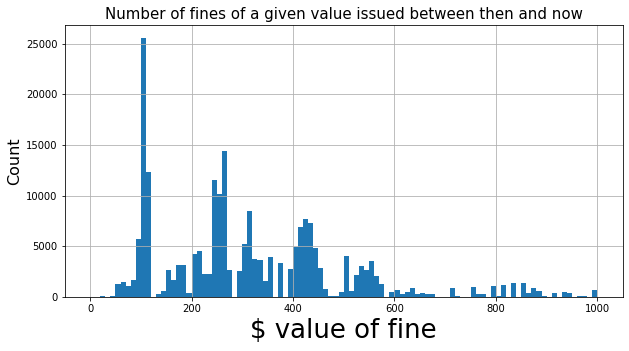

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=16)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... RED_LIGHT_CAMERA_IND SPEED_CAMERA_IND SEATBELT_IND  \
0         7163.0  ...                    Y              NaN          NaN   
1            NaN  ...                  NaN              NaN          NaN   

  MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0              NaN         NaN      NaN      NaN                 NaN   
1              NaN           Y      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE  
0           46       16238  
1           78       20670  

[2 rows x 25 columns]

This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
f"range is: {penalty_data.OFFENCE_MONTH.min()} to {penalty_data.OFFENCE_MONTH.max()}"

'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date   = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

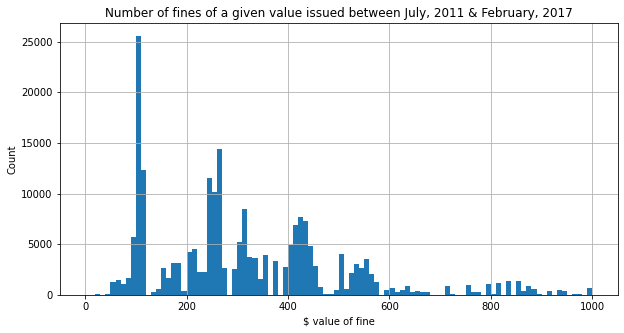

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title(f"Number of fines of a given value issued between {earliest_date} & {latest_date}", fontsize=12)
plt.xlabel('$ value of fine', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True)
plt.show()

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

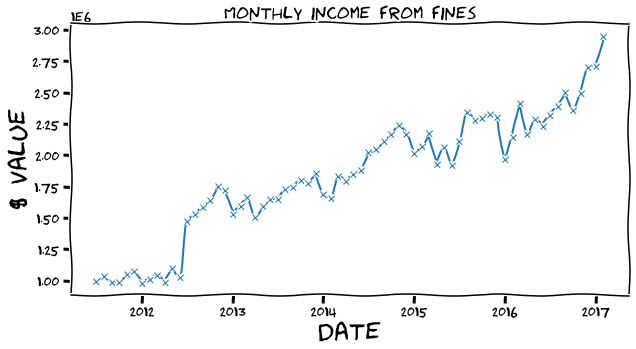

In [ ]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [ ]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)

<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... SEATBELT_IND MOBILE_PHONE_IND PARKING_IND CINS_IND  \
0         7163.0  ...          NaN              NaN         NaN      NaN   
1            NaN  ...          NaN              NaN           Y      NaN   

  FOOD_IND BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  
0      NaN                 NaN           46       16238   1               1  
1      NaN                 NaN           78       20670   1               1  

[2 rows x 27 columns]

Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day

ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND  \
0         7163.0  ...              NaN         NaN      NaN      NaN   

  BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  \
0                 NaN           46       16238   1               1   

  day_from_function  
0                 1  

[1 rows x 28 columns]

Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0         7163.0  ...         NaN      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE day day_from_lambda day_from_function nice_day  
0           46       16238   1               1                 1   Friday  

[1 rows x 29 columns]

Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

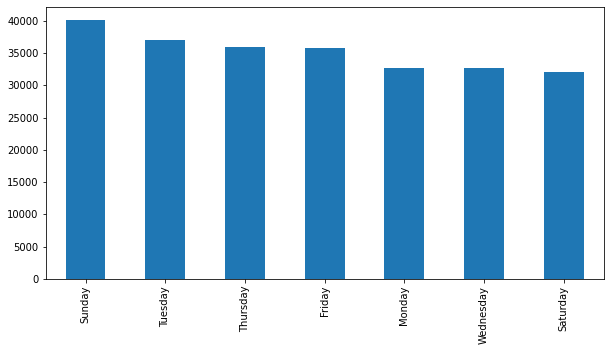

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")

And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_